In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
plt.rcParams["figure.figsize"] = (14,4)

In [6]:
data = pd.read_csv("../data/base_limpia.csv", parse_dates=["tiempo", "fecha pedido", "fecha liq"])

In [7]:
data = data.drop(columns=["Unnamed: 0", "nro factura"])

In [20]:
ts = data.groupby(["tiempo", "producto"])["u pedidas"].sum().unstack().fillna(0)

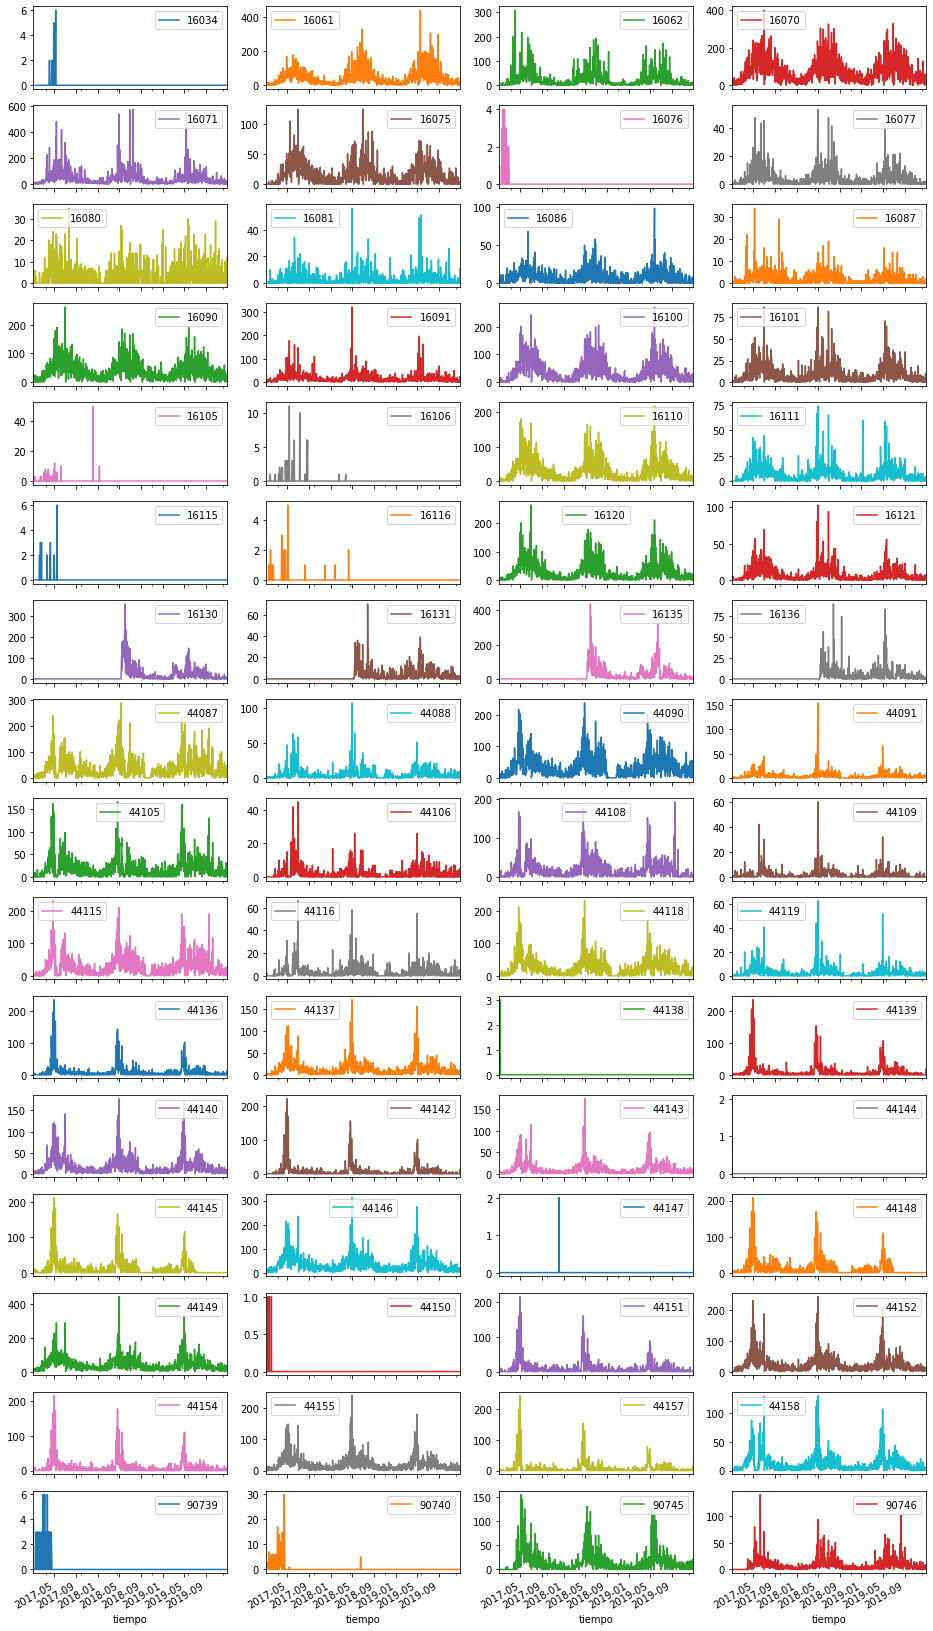

In [27]:
n_cols = 4
ts.plot(subplots=True, layout=(len(ts.columns)//n_cols, n_cols), figsize=(16,32));

In [67]:
amount_info = (ts != 0).sum() / len(ts)
T = 0.5
forecastable = (amount_info > T)

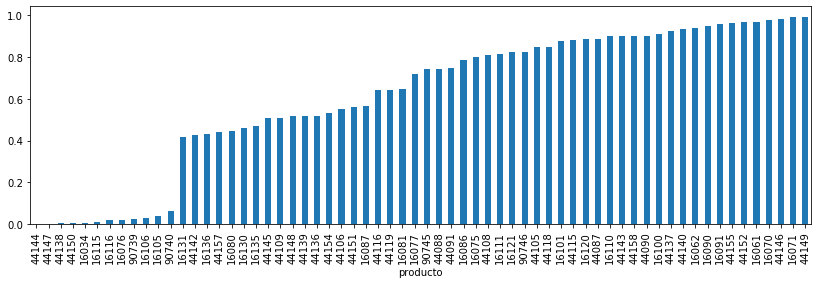

In [68]:
amount_info.sort_values().plot(kind="bar")

In [72]:
ts_forecastable = ts.loc[:, forecastable]

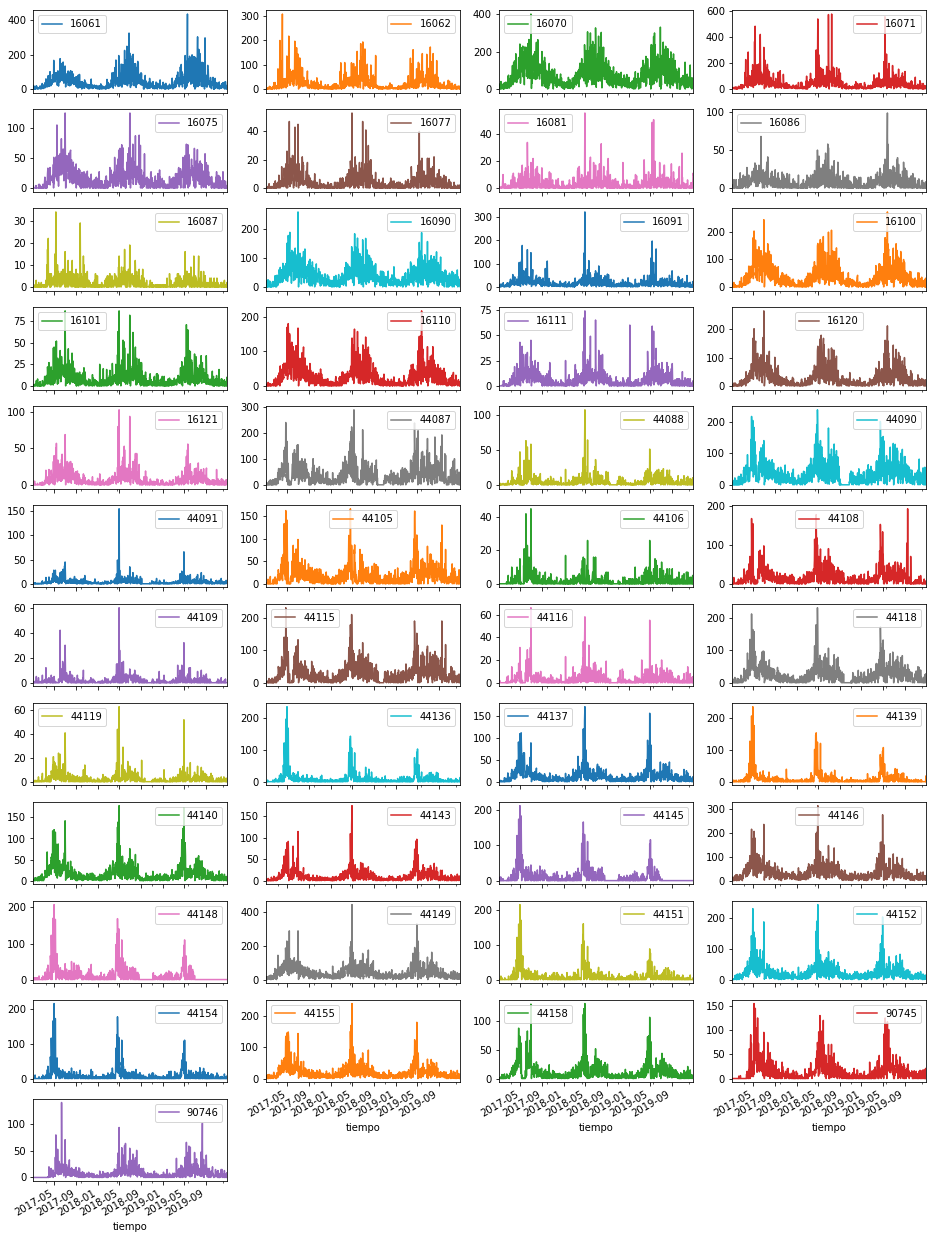

In [73]:
n_cols = 4
ts_forecastable.plot(subplots=True, layout=(len(ts.columns)//n_cols, n_cols), figsize=(16,32));

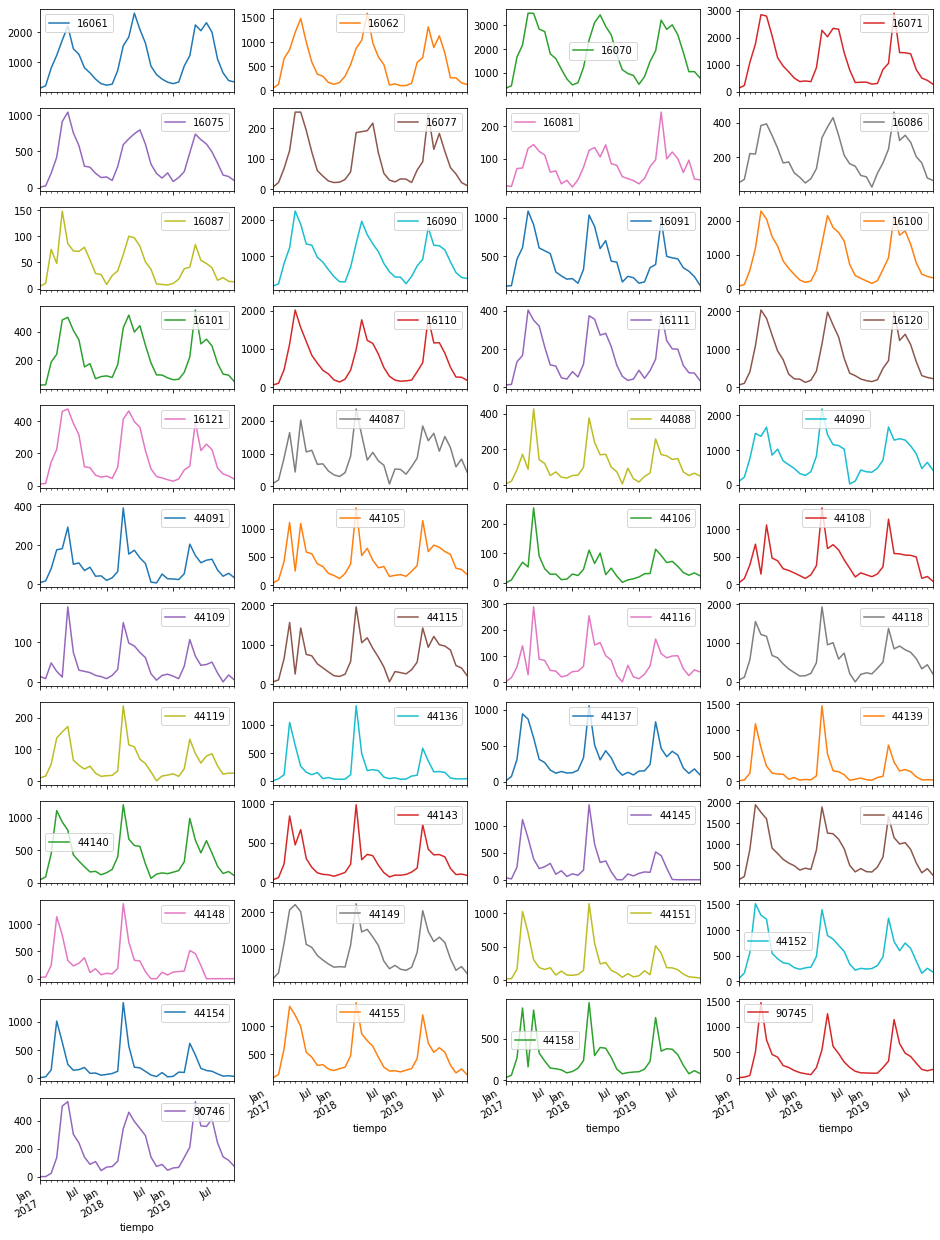

In [88]:
ts_forecastable_m = ts_forecastable.resample("M").sum()
ts_forecastable_m.plot(subplots=True, layout=(len(ts.columns)//n_cols, n_cols), figsize=(16,32));

In [183]:
from fbprophet import Prophet
from sklearn.model_selection import train_test_split
import statsmodels.tsa.api as tsa
pd.plotting.register_matplotlib_converters()

In [85]:
for product in ts_forecastable_m.columns:
    m = Prophet()
    models.append(m)
    train_product = train[product]
    train_product.index.name = "ds"
    train_product.name = "y"
    train_product = train_product.reset_index()
    m.fit(train_product)

In [194]:
ts_forecastable_m = ts_forecastable.resample("M").sum()

In [251]:
train, test = ts_forecastable[:"2018-12-31"], ts_forecastable["2019-01-01":]

In [196]:
train.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-07', '2017-01-09', '2017-01-10',
               '2017-01-11', '2017-01-12',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-22', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', name='tiempo', length=587, freq=None)

In [190]:
test.index

DatetimeIndex(['2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31'],
              dtype='datetime64[ns]', name='tiempo', freq='M')

In [107]:
ts_forecastable_m.columns

Index([16061, 16062, 16070, 16071, 16075, 16077, 16081, 16086, 16087, 16090,
       16091, 16100, 16101, 16110, 16111, 16120, 16121, 44087, 44088, 44090,
       44091, 44105, 44106, 44108, 44109, 44115, 44116, 44118, 44119, 44136,
       44137, 44139, 44140, 44143, 44145, 44146, 44148, 44149, 44151, 44152,
       44154, 44155, 44158, 90745, 90746],
      dtype='object', name='producto')

In [252]:
ts_product_train = train[16062]

In [253]:
ts_product_test = test[16062]

In [217]:
#ts_product = ts_product.set_index("ds").resample("M").sum()
#ts_product_train = ts_product_train.set_index("ds")

AttributeError: 'Series' object has no attribute 'set_index'

In [172]:
#ts_product.index.name = "ds"

In [173]:
#ts_product.name = "y"

In [174]:
#ts_product = ts_product.reset_index()

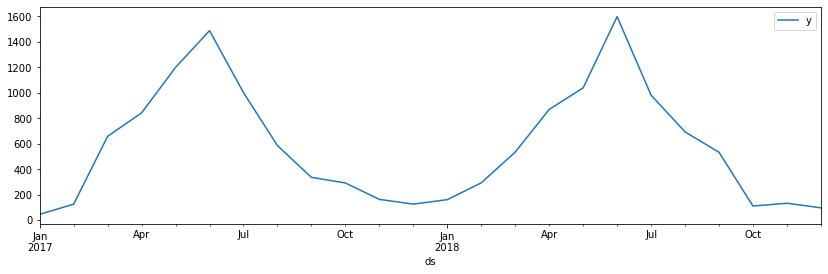

In [203]:
ts_product.plot()

In [176]:
m = Prophet()

In [177]:
m.fit(ts_product)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [178]:
future = m.make_future_dataframe(365, freq="D")

In [179]:
fcst = m.predict(future)

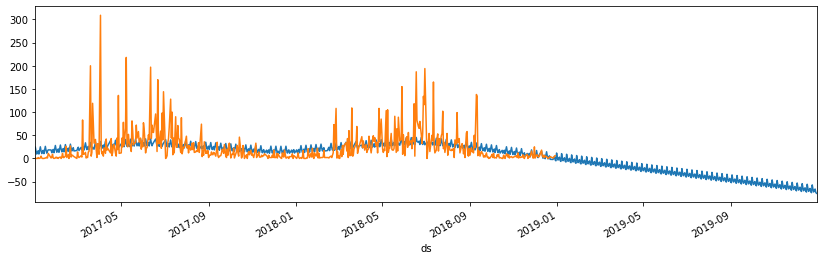

In [181]:
fcst.set_index("ds").yhat.plot()
ts_product.set_index("ds").y.plot()

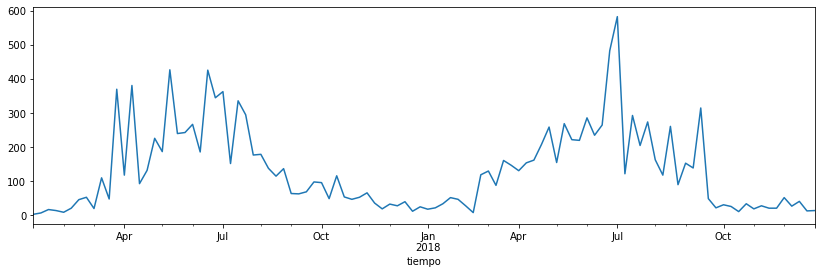

In [234]:
ts_product_train.resample("W").sum().plot()

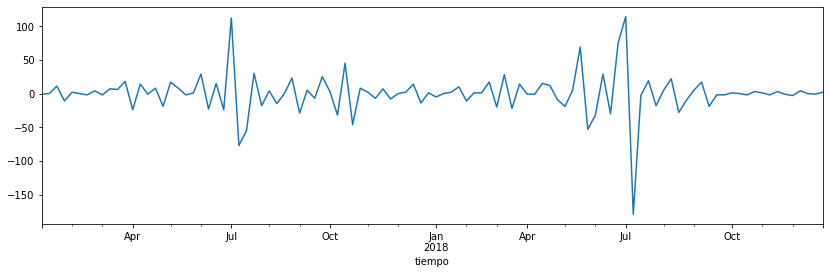

In [233]:
ts_product_train.diff(periods=1).resample("W").sum().plot()

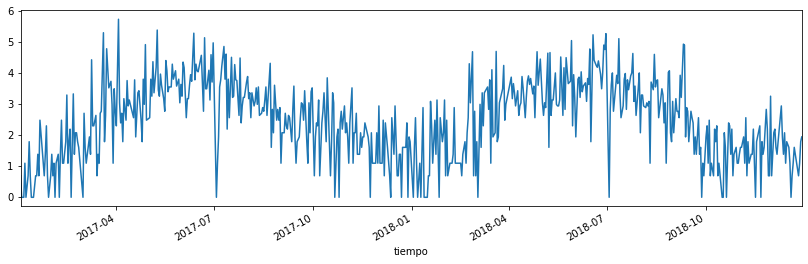

In [245]:
np.log(ts_product_train+1).plot()

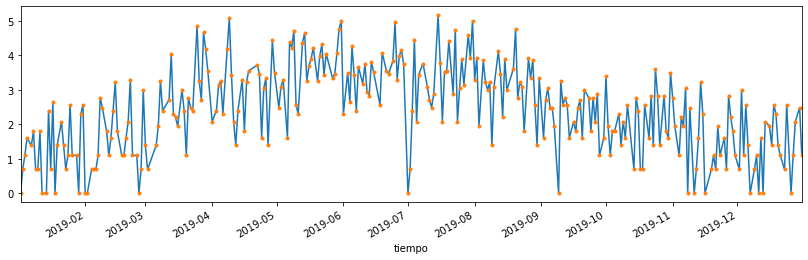

In [259]:
np.log(ts_product_test+1).plot(kind="line")
np.log(ts_product_test+1).plot(kind="line", style=".")

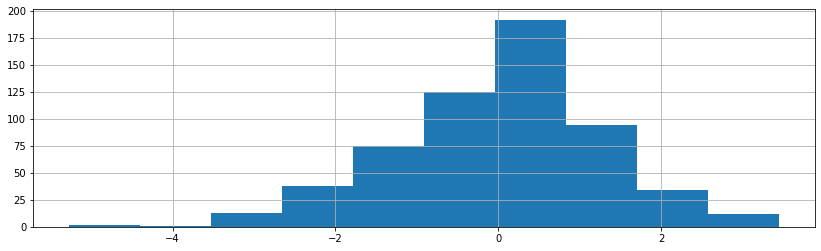

In [249]:
np.log(ts_product_train+1).diff().dropna().hist()